In [2]:
import tensorflow as tf
from keras.models import Sequential
from keras.layers import Dense, Conv2D, MaxPooling2D, Dropout, Flatten
import pandas as pd
import numpy as np 

In [3]:
#Importing the dataset
from google.colab import drive
drive.mount("/content/gdrive")

Mounted at /content/gdrive


In [7]:
df=pd.read_csv("/content/gdrive/MyDrive/train.csv")
df.head()

,label,pixel0,pixel1,pixel2,pixel3,pixel4,pixel5,pixel6,pixel7,pixel8,...,pixel774,pixel775,pixel776,pixel777,pixel778,pixel779,pixel780,pixel781,pixel782,pixel783
0,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,1,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,4,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [20]:
x=df.drop('label',axis=1)
y=df['label']
from sklearn.model_selection import train_test_split
train_x,test_x,train_y,test_y=train_test_split(x,y,test_size=0.3,shuffle=True,random_state=1)

In [25]:
#PreProcessing
train_x=train_x.astype('float32')
test_x=test_x.astype('float32')
train_y = tf.keras.utils.to_categorical(train_y, 10) 
test_y = tf.keras.utils.to_categorical(test_y, 10)

In [26]:
#Model with 512 hidden layers
model3 = tf.keras.Sequential()
N_hidden = 512
model3.add(tf.keras.layers.Dense(N_hidden, input_shape = (784,), name = 'dense_layer', activation = 'relu'))
model3.add(Dropout(0.3))
model3.add(tf.keras.layers.Dense(N_hidden,name = 'dense_layer2', activation = 'relu'))
model3.add(Dropout(0.3))
model3.add(tf.keras.layers.Dense(10, name='dense_layer_3', activation = 'softmax'))

model3.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model3.summary()

Model: "sequential_4"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 512)               401920    
                                                                 
 dropout_6 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer2 (Dense)        (None, 512)               262656    
                                                                 
 dropout_7 (Dropout)         (None, 512)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                5130      
                                                                 
Total params: 669,706
Trainable params: 669,706
Non-trainable params: 0
_________________________________________________________________


In [46]:
training = model3.fit(train_x, train_y, batch_size=64, epochs=100, validation_split=0.2, verbose = 0) 

Accuracy is: 0.9982143044471741


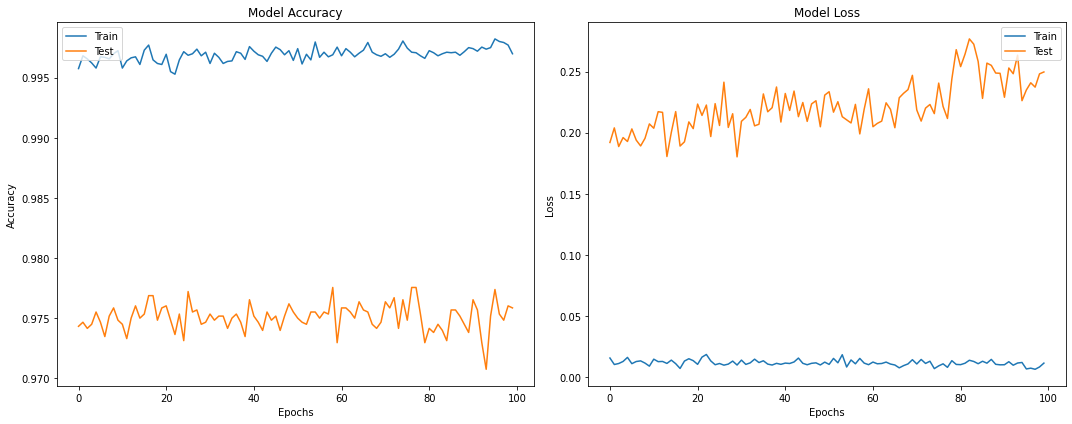

In [47]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(training.history['accuracy'])
plt.plot(training.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.subplot(1,2,2)
plt.plot(training.history['loss'])
plt.plot(training.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.tight_layout()
li=training.history['accuracy']
print("Accuracy is:",max(li))

In [48]:
#Model with 256 hidden layers
model2 = tf.keras.Sequential()
N_hidden = 256
model2.add(tf.keras.layers.Dense(N_hidden, input_shape = (784,), name = 'dense_layer', activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(tf.keras.layers.Dense(N_hidden,name = 'dense_layer2', activation = 'relu'))
model2.add(Dropout(0.3))
model2.add(tf.keras.layers.Dense(10, name='dense_layer_3', activation = 'softmax'))

model2.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model2.summary()

Model: "sequential_9"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 256)               200960    
                                                                 
 dropout_16 (Dropout)        (None, 256)               0         
                                                                 
 dense_layer2 (Dense)        (None, 256)               65792     
                                                                 
 dropout_17 (Dropout)        (None, 256)               0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                2570      
                                                                 
Total params: 269,322
Trainable params: 269,322
Non-trainable params: 0
_________________________________________________________________


In [49]:
training1 = model2.fit(train_x, train_y, batch_size=64, epochs=100, validation_split=0.2, verbose = 0) 

Accuracy when hidden layer is 256: 0.9969387650489807


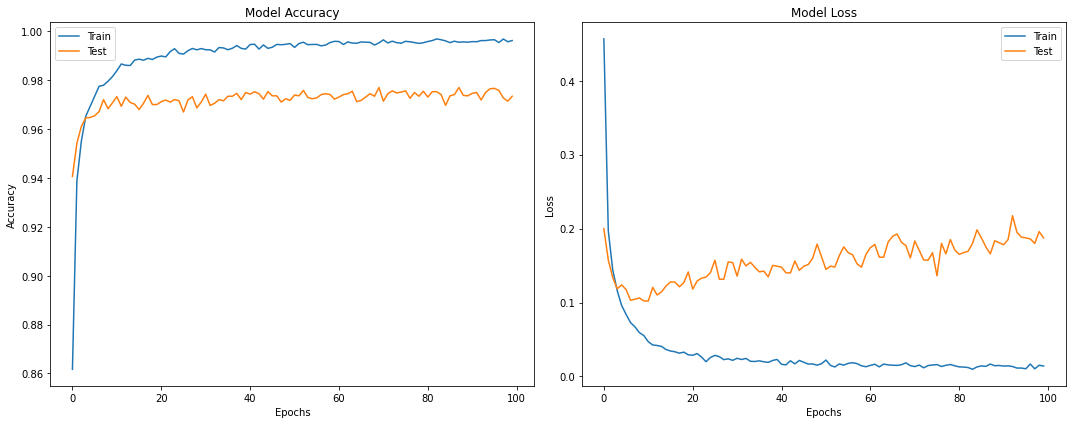

In [50]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(training1.history['accuracy'])
plt.plot(training1.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.subplot(1,2,2)
plt.plot(training1.history['loss'])
plt.plot(training1.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.tight_layout()
li1=training1.history['accuracy']
print("Accuracy when hidden layer is 256:",max(li1))

In [51]:
#Model with 1 hidden layers
model1 = tf.keras.Sequential()
N_hidden = 1
model1.add(tf.keras.layers.Dense(N_hidden, input_shape = (784,), name = 'dense_layer', activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(tf.keras.layers.Dense(N_hidden,name = 'dense_layer2', activation = 'relu'))
model1.add(Dropout(0.3))
model1.add(tf.keras.layers.Dense(10, name='dense_layer_3', activation = 'softmax'))

model1.compile(optimizer='adam', 
              loss='categorical_crossentropy',
              metrics=['accuracy'])

model1.summary()

Model: "sequential_10"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 dense_layer (Dense)         (None, 1)                 785       
                                                                 
 dropout_18 (Dropout)        (None, 1)                 0         
                                                                 
 dense_layer2 (Dense)        (None, 1)                 2         
                                                                 
 dropout_19 (Dropout)        (None, 1)                 0         
                                                                 
 dense_layer_3 (Dense)       (None, 10)                20        
                                                                 
Total params: 807
Trainable params: 807
Non-trainable params: 0
_________________________________________________________________


In [52]:
training2 = model1.fit(train_x, train_y, batch_size=64, epochs=100, validation_split=0.2, verbose = 0) 

Accuracy when hidden layer is 1: 0.1800595223903656


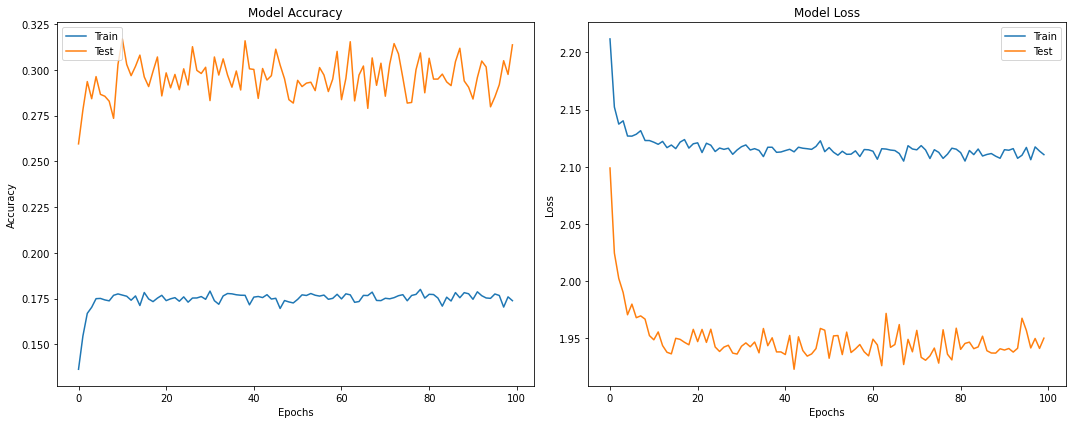

In [53]:
plt.figure(figsize = (15,6))
plt.subplot(1,2,1)
plt.plot(training2.history['accuracy'])
plt.plot(training2.history['val_accuracy'])
plt.title('Model Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend(['Train', 'Test'], loc = 'upper left')
plt.subplot(1,2,2)
plt.plot(training2.history['loss'])
plt.plot(training2.history['val_loss'])
plt.title('Model Loss')
plt.xlabel('Epochs')
plt.ylabel('Loss')
plt.legend(['Train', 'Test'], loc = 'upper right')
plt.tight_layout()
li10=training2.history['accuracy']
print("Accuracy when hidden layer is 1:",max(li10))

In [54]:
print("Accuracy when hidden Layers is 512 is: ",max(li))
print("Accuracy when hidden layers is 256 is: ",max(li1))
print("Accuracy when it is single perceptron is: ",max(li10))

Accuracy when hidden Layers is 512 is:  0.9982143044471741
Accuracy when hidden layers is 256 is:  0.9969387650489807
Accuracy when it is single perceptron is:  0.1800595223903656
